<a href="https://colab.research.google.com/github/NishitMittal2004/EDA_on_IMDB_Movies_Dataset/blob/main/IMDB_Movies_Dataset_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA on IMDB Movies Dataset**


---
## 1. Importing all required libraries
---

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
path = '/content/imdb_top_1000.csv'
data = pd.read_csv(path)

---
## 2. Shape of the data
---

In [15]:
print("The shape of the dataset is: {} rows and {} columns".format(data.shape[0], data.shape[1]))

The shape of the dataset is: 1000 rows and 16 columns


---
## 3. Quick view of data
---

In [16]:
data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [18]:
data.tail()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN
999,https://m.media-amazon.com/images/M/MV5BMTY5OD...,The 39 Steps,1935,NaN,86 min,"Crime, Mystery, Thriller",7.6,A man in London tries to help a counter-espion...,93.0,Alfred Hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,51853,NaN


---
## 4. Checking the types of data
---

In [19]:
data.dtypes

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

In [20]:
print(data['Gross'].head(1))
data['Gross'] = data['Gross'].str.replace(',', '')
print(data['Gross'].head(1))

data['Gross'] = data['Gross'].astype('float64')
data['Gross'] = data['Gross'].replace(np.nan, 0)

0    28,341,469
Name: Gross, dtype: object
0    28341469
Name: Gross, dtype: object


In [21]:
data['Gross'] = data['Gross'].astype(int)

In [22]:
data['Gross'].dtype

dtype('int64')

---
## 5. Dropping irrelevant columns
---

In [23]:
pd.unique(data['Poster_Link'])

array(['https://m.media-amazon.com/images/M/MV5BMDFkYTc0MGEtZmNhMC00ZDIzLWFmNTEtODM1ZmRlYWMwMWFmXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_UX67_CR0,0,67,98_AL_.jpg',
       'https://m.media-amazon.com/images/M/MV5BM2MyNjYxNmUtYTAwNi00MTYxLWJmNWYtYzZlODY3ZTk3OTFlXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_UY98_CR1,0,67,98_AL_.jpg',
       'https://m.media-amazon.com/images/M/MV5BMTMxNTMwODM0NF5BMl5BanBnXkFtZTcwODAyMTk2Mw@@._V1_UX67_CR0,0,67,98_AL_.jpg',
       'https://m.media-amazon.com/images/M/MV5BMWMwMGQzZTItY2JlNC00OWZiLWIyMDctNDk2ZDQ2YjRjMWQ0XkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_UY98_CR1,0,67,98_AL_.jpg',
       'https://m.media-amazon.com/images/M/MV5BMWU4N2FjNzYtNTVkNC00NzQ0LTg0MjAtYTJlMjFhNGUxZDFmXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_UX67_CR0,0,67,98_AL_.jpg',
       'https://m.media-amazon.com/images/M/MV5BNzA5ZDNlZWMtM2NhNS00NDJjLTk4NDItYTRmY2EwMWZlMTY3XkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_UX67_CR0,0,67,98_AL_.jpg',
       'https://m.media-amazon.com/images/M/MV5BNGNhMDIzZTUtNTBlZi00MTRlLWFjM2ItYzViMjE3YzI5Mjlj

In [24]:
data = data.drop(['Poster_Link'], axis=1)
data.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


---
## 6. Renaming the columns
---

In [25]:
data = data.rename(columns={"Series_Title":"Movies_Title","Released_Year":"Year", "No_of_Votes":"Votes", "IMDB_Rating":"IMDB"})
data.head(2)

,Movies_Title,Year,Certificate,Runtime,Genre,IMDB,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411


---
## 7. Dropping the missing or null values
---

In [29]:
print(data.isnull().sum())

Movies_Title      0
Year              0
Certificate     101
Runtime           0
Genre             0
IMDB              0
Overview          0
Meta_score      157
Director          0
Star1             0
Star2             0
Star3             0
Star4             0
Votes             0
Gross             0
dtype: int64


In [30]:
data = data.dropna()    # Dropping the missing values.
data.count()

Movies_Title    787
Year            787
Certificate     787
Runtime         787
Genre           787
IMDB            787
Overview        787
Meta_score      787
Director        787
Star1           787
Star2           787
Star3           787
Star4           787
Votes           787
Gross           787
dtype: int64

In [31]:
print(data.isnull().sum())   # After dropping the values

Movies_Title    0
Year            0
Certificate     0
Runtime         0
Genre           0
IMDB            0
Overview        0
Meta_score      0
Director        0
Star1           0
Star2           0
Star3           0
Star4           0
Votes           0
Gross           0
dtype: int64


---
## 8. Finding correlation
---

In [32]:
data.corr()

<ipython-input-32-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,IMDB,Meta_score,Votes,Gross
IMDB,1.000000,0.273777,0.598026,0.122895
Meta_score,0.273777,1.000000,0.005232,-0.034757
Votes,0.598026,0.005232,1.000000,0.564663
Gross,0.122895,-0.034757,0.564663,1.000000



## 9. Plot different features against one another


---
### Histogram
---

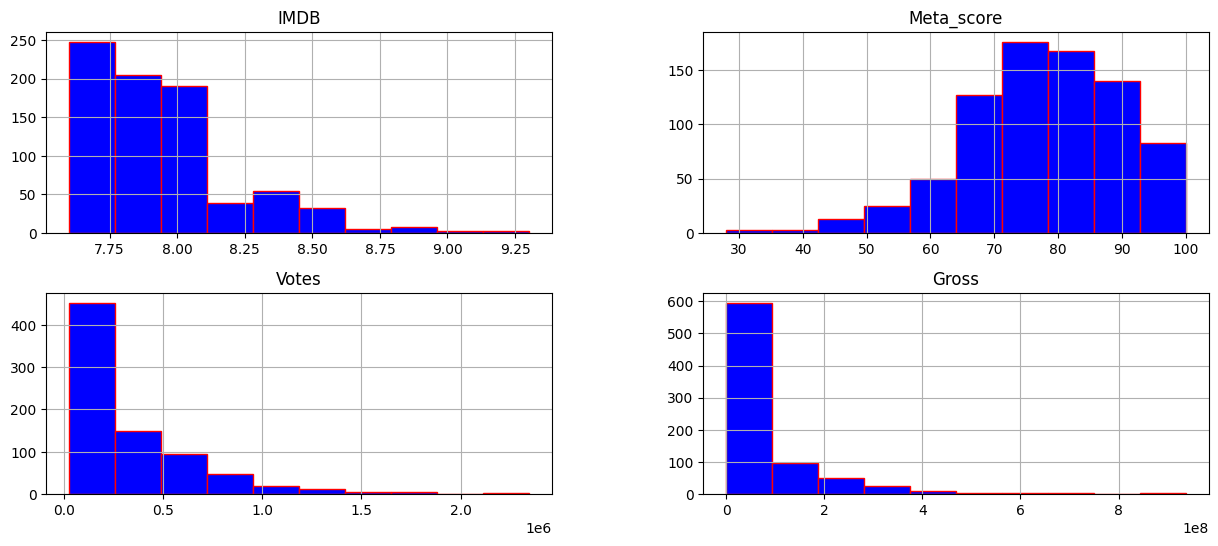

In [33]:
numerical_attributes = ['IMDB', 'Meta_score', 'Votes', 'Gross']
data[numerical_attributes].hist(figsize = (15, 6), color = 'blue', edgecolor = 'red', layout = (2, 2));

In [34]:
data.describe(include = ['O'])

,Movies_Title,Year,Certificate,Runtime,Genre,Overview,Director,Star1,Star2,Star3,Star4
count,787,787,787,787,787,787,787,787,787,787,787
unique,787,90,13,123,180,787,434,516,659,691,742
top,The Shawshank Redemption,2014,U,130 min,Drama,Two imprisoned men bond over a number of years...,Steven Spielberg,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine
freq,1,29,202,22,63,1,13,12,7,5,4


In [36]:
top_voted = data.sort_values(['Votes'], ascending = False)

---
### Top voted movies
---

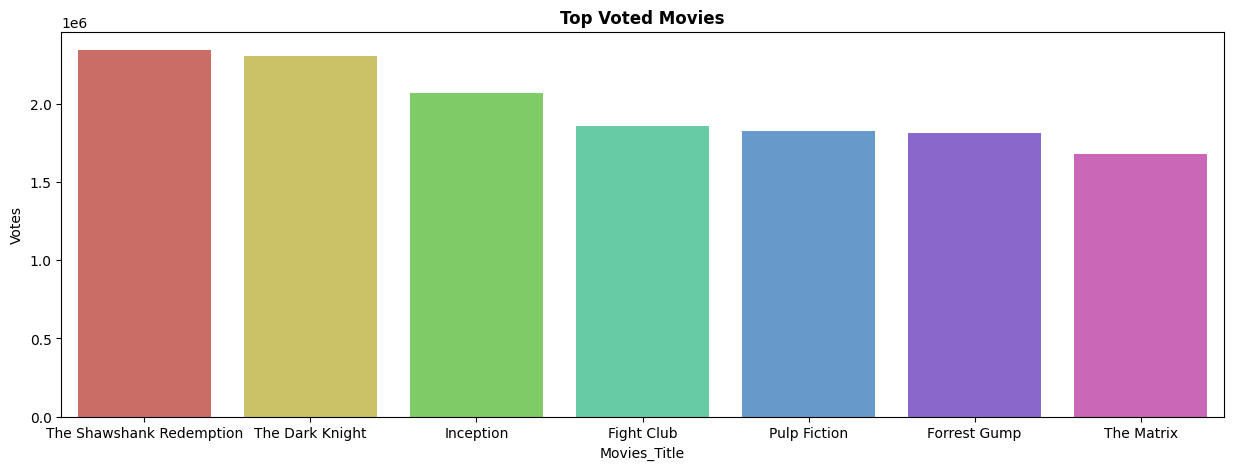

In [44]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['Movies_Title'][:7],y=top_voted['Votes'][:7], palette = 'hls')
g.set_title("Top Voted Movies", weight = "bold")
plt.show()

---
### Top voted movies ratings
---

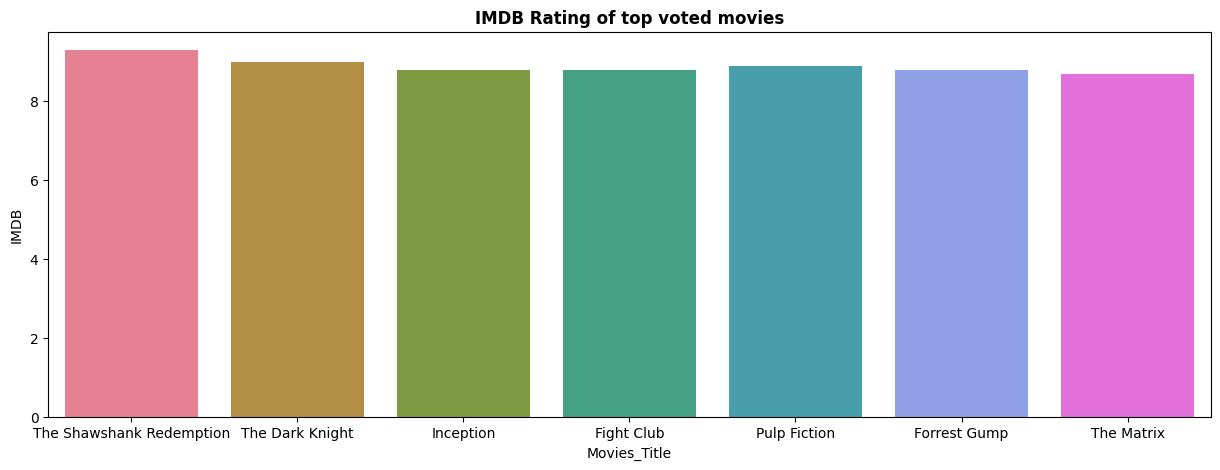

In [46]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['Movies_Title'][:7],y=top_voted['IMDB'][:7], palette = 'husl')
g.set_title("IMDB Rating of top voted movies", weight = "bold")
plt.show()

---
### Top voted movies metascores
---

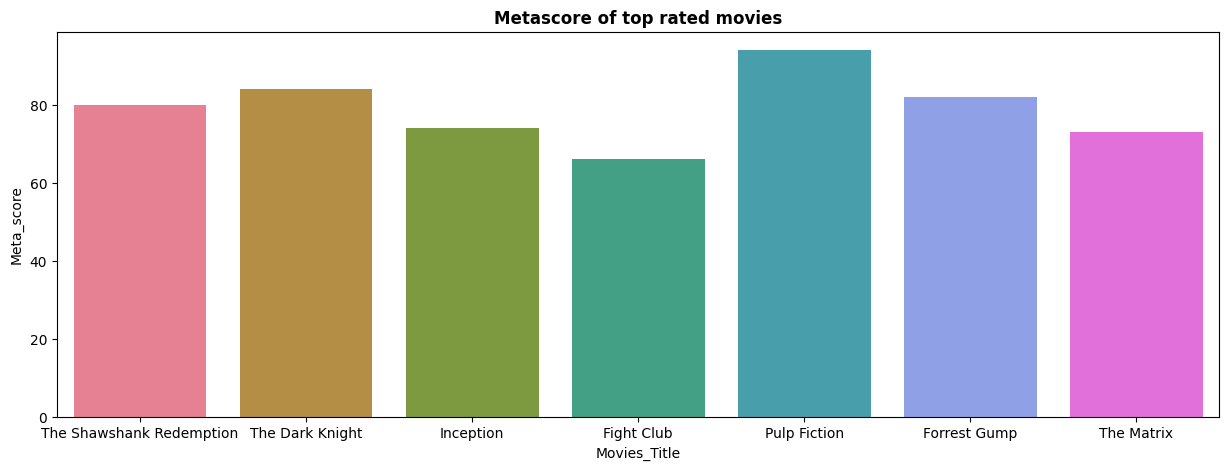

In [42]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['Movies_Title'][:7],y=top_voted['Meta_score'][:7], palette = 'husl')
g.set_title("Metascore of top rated movies", weight = "bold")
plt.show()


---
### Top movies by Gross
---

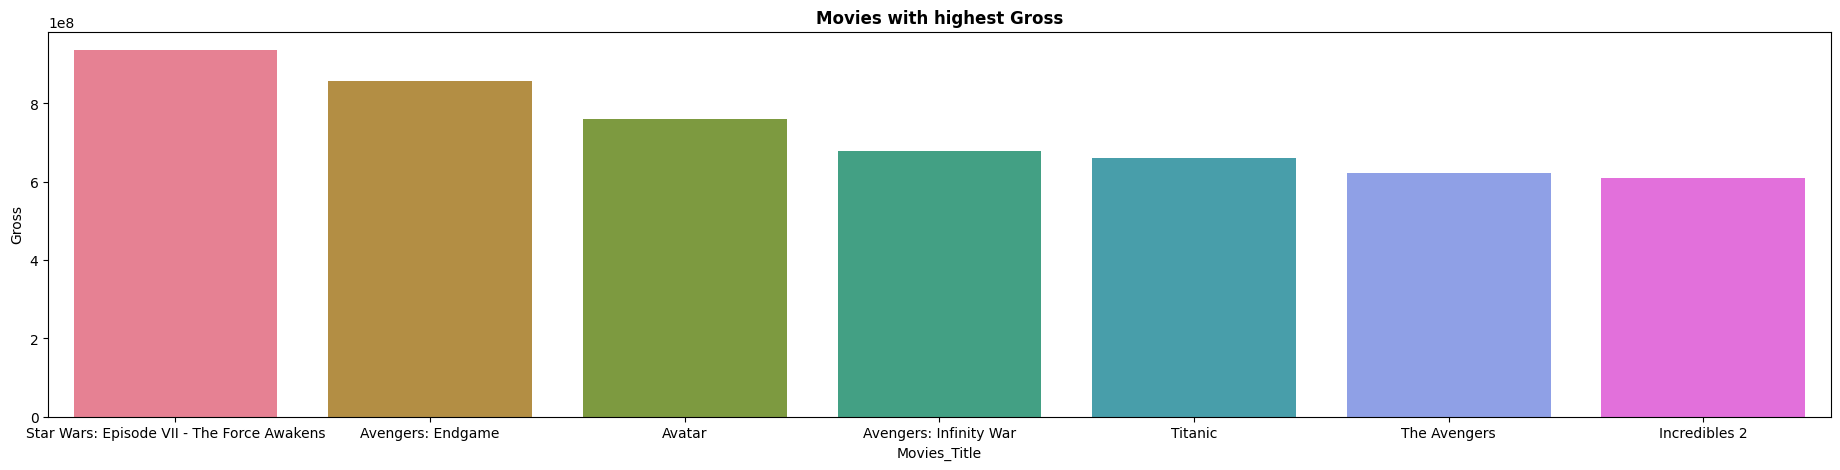

In [54]:
highest_earning = data.sort_values(['Gross'], ascending = False)
fig,axs=plt.subplots(figsize=(23,5))
g=sns.barplot(x=highest_earning['Movies_Title'][:7],y=highest_earning['Gross'][:7], palette = 'husl')
g.set_title("Movies with highest Gross", weight = "bold")
plt.show()


---
### Maximum movies released in :
---

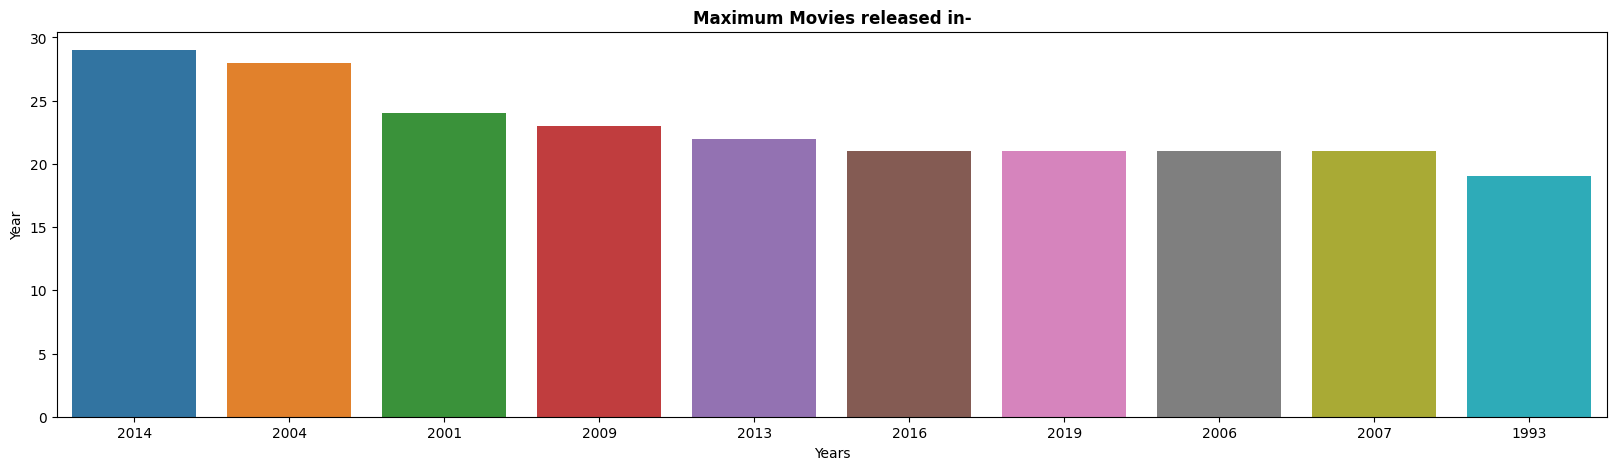

In [56]:
fig,axs=plt.subplots(figsize=(20,5))
g=sns.barplot(x=data['Year'].value_counts()[:10].index,y=data['Year'].value_counts()[:10])
g.set_title("Maximum Movies released in-", weight = "bold")
g.set_xlabel("Years")
plt.show()

---
### Mostly occurred Directors (lineplot)
---

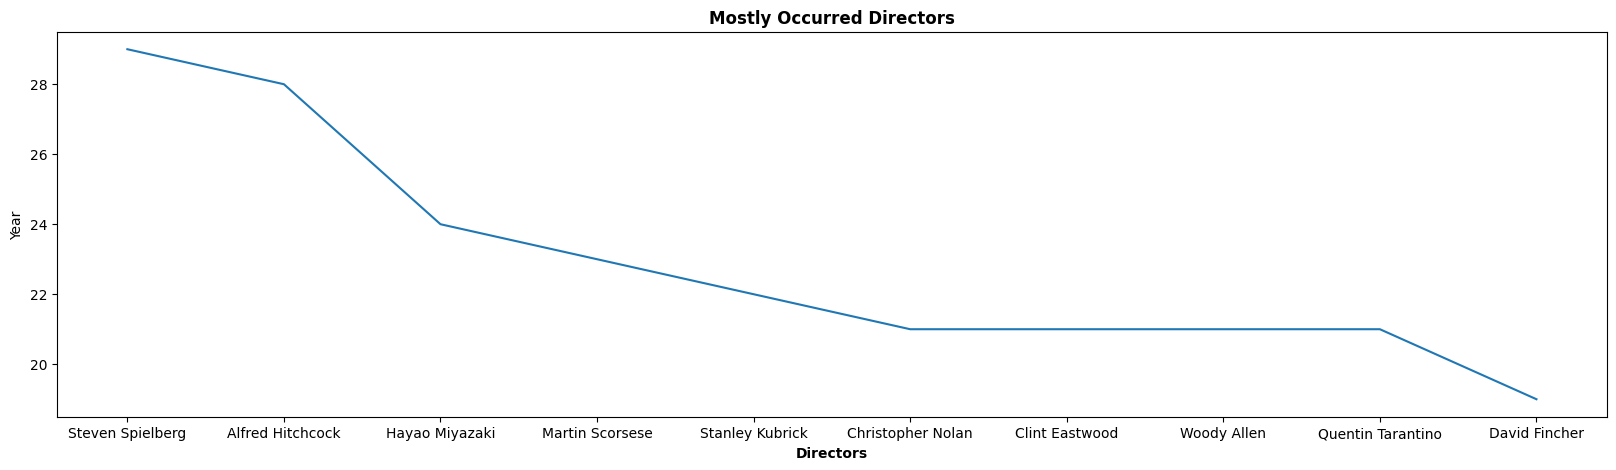

In [58]:
fig,axs=plt.subplots(figsize=(20,5))
g=sns.lineplot(x=data['Director'].value_counts()[:10].index,y=data['Year'].value_counts()[:10])
g.set_title("Mostly Occurred Directors", weight = "bold")
g.set_xlabel("Directors", weight = "bold")
plt.show()

---
### Mostly occurred directors (barplot)
---

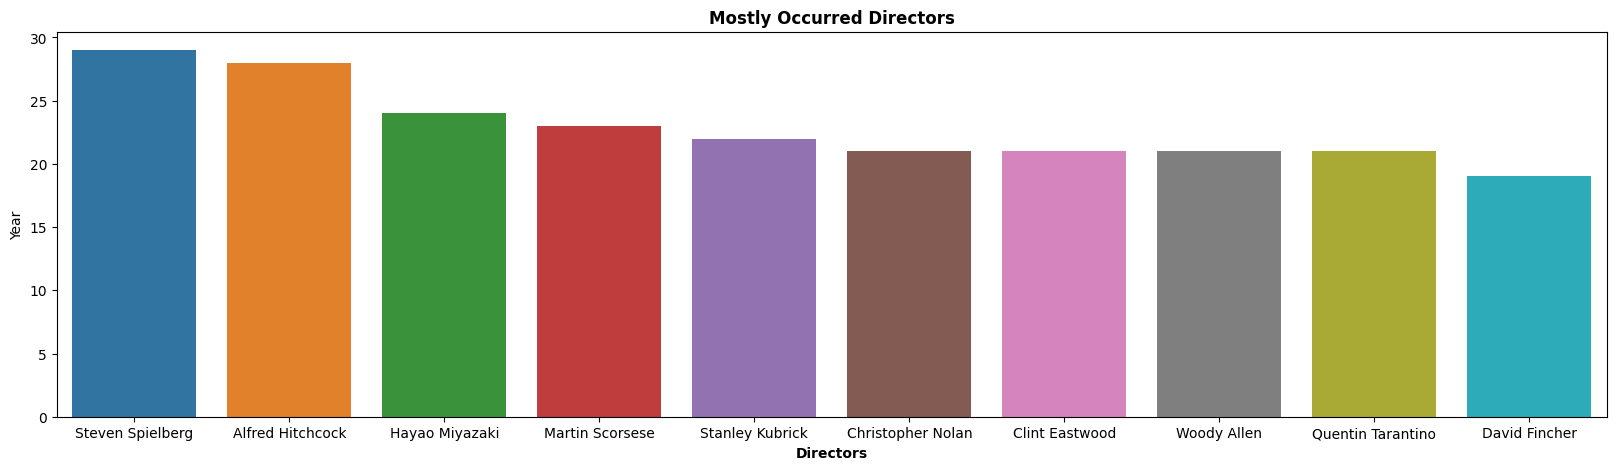

In [59]:
fig,axs=plt.subplots(figsize=(20,5))
g=sns.barplot(x=data['Director'].value_counts()[:10].index,y=data['Year'].value_counts()[:10])
g.set_title("Mostly Occurred Directors", weight = "bold")
g.set_xlabel("Directors", weight = "bold")
plt.show()

---
### Runtime of the movies
---

In [61]:
import re
duration=[]
for x in data["Runtime"]:
    p=re.compile('\d+')
    j=p.findall(x)
    if len(j)==2:
        duration.append(int(j[1])-int(j[0])+1)
    else:
        duration.append(int(j[0])+1)
data['duration']=duration

In [62]:
data['duration'].head()

0    143
1    176
2    153
3    203
4     97
Name: duration, dtype: int64

Text(0.5, 1.0, 'Time Duration of movies')

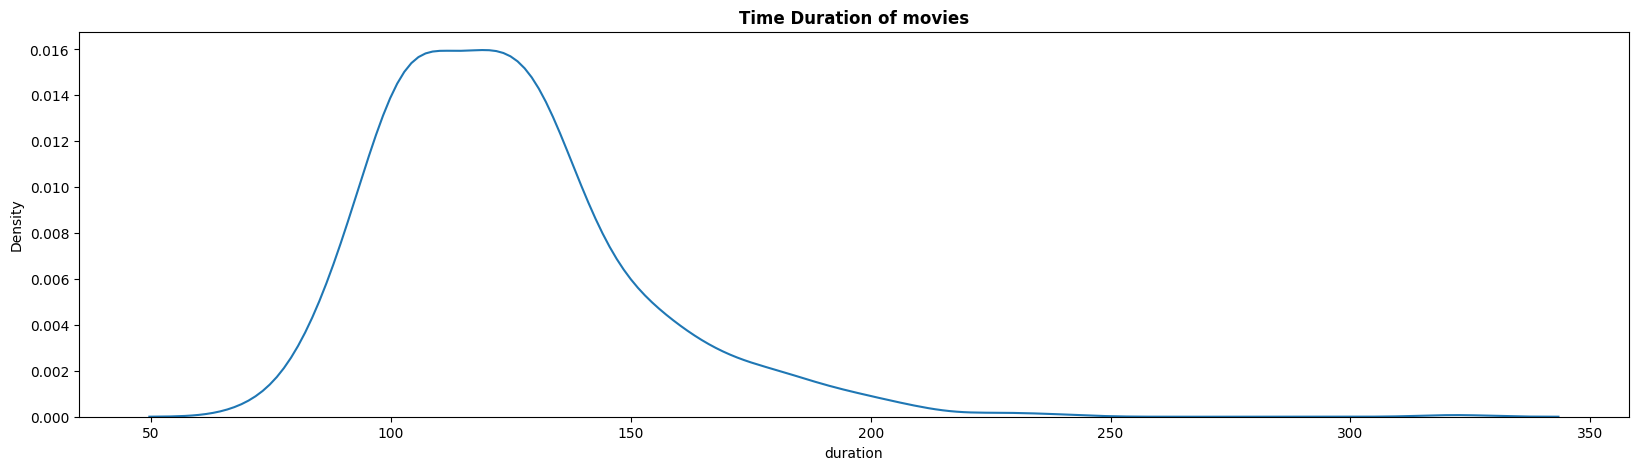

In [63]:
fig,axs=plt.subplots(figsize=(20,5))
g=sns.kdeplot(data['duration'])
g.set_title("Time Duration of movies", weight = "bold")

---
### Stars with most Occurences in movies
---

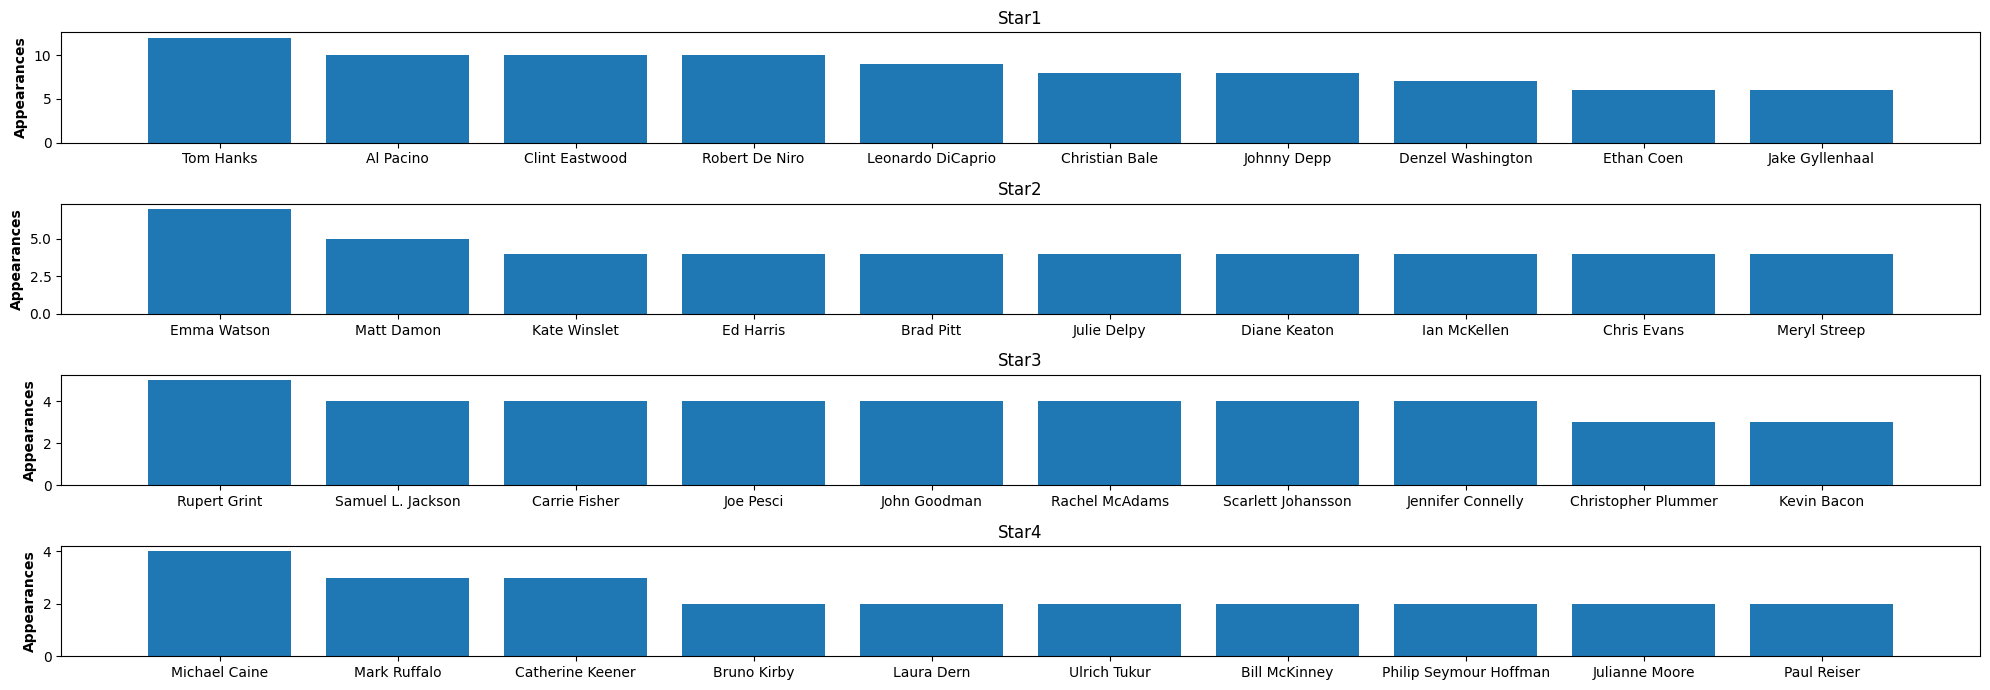

In [64]:
stars=['Star1','Star2','Star3','Star4']
fig,axs=plt.subplots(4,1,figsize=(20,7))
ax=0
for x in stars:
    axs[ax].bar(data[x].value_counts()[:10].index,data[x].value_counts()[:10])
    axs[ax].set_title(x)
    axs[ax].set_ylabel("Appearances", weight = "bold")
    ax+=1
    plt.tight_layout()

---
### IMDB Rating Distribution
---

<ipython-input-68-11675c8c1ec0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g=sns.distplot(data['IMDB'],bins=30)


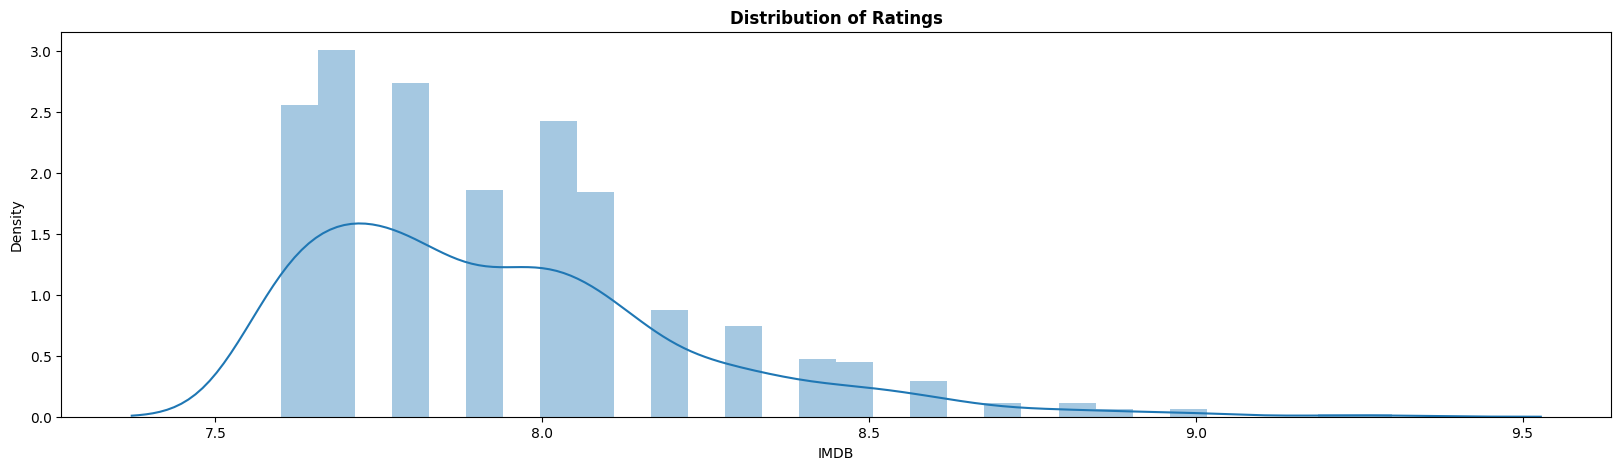

In [68]:
fig,axs=plt.subplots(figsize=(20,5))
g=sns.distplot(data['IMDB'],bins=30)
g.set_title("Distribution of Ratings", weight = "bold")
plt.show()

---
### Top 10 Genres
---

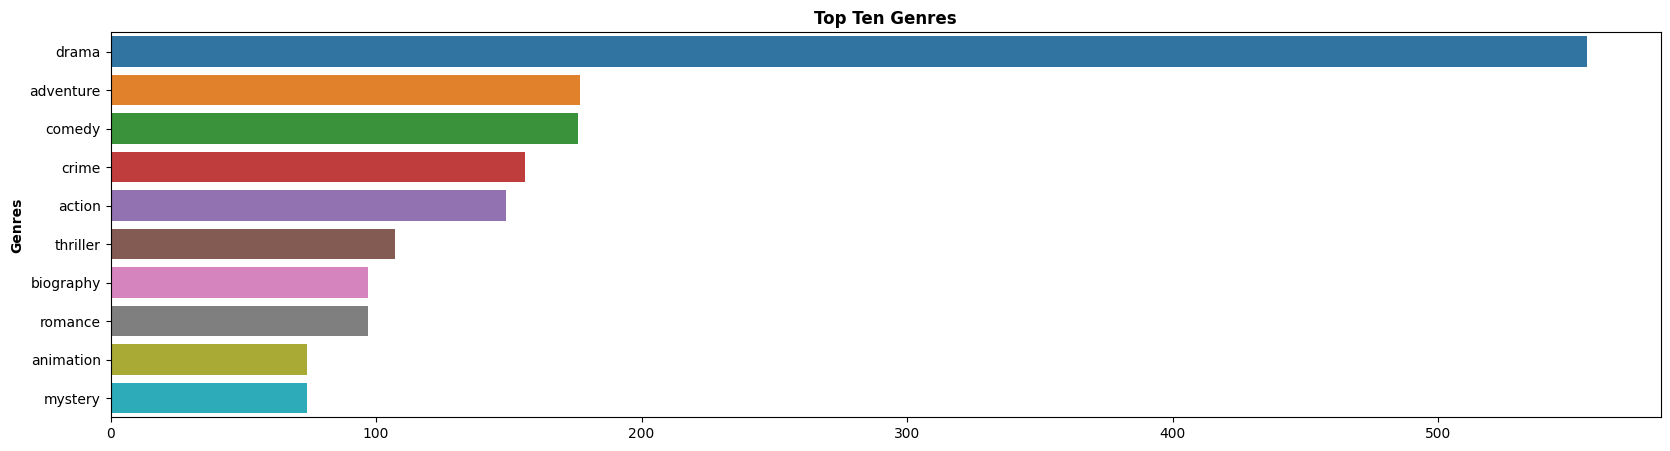

In [73]:
from collections import Counter
genre=[]
for x in data['Genre']:
    for y in x.split(','):
        genre.append(y.strip().lower())

count=Counter(genre)
count=count.most_common()[:10]
x,y=map(list,zip(*count))

fig,axs=plt.subplots(figsize=(20,5))
g=sns.barplot(x=y,y=x)
g.set_ylabel("Genres", weight = "bold")
g.set_title("Top Ten Genres", weight = "bold")
plt.show()